In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
X = df[["TV", "Radio", "Newspaper"]].values
y = df[["Sales"]].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

In [9]:
class DeepRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(DeepRegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.network(x)

In [10]:
model = DeepRegressionModel(input_dim=X_train.shape[1])
print("\nModel architecture:")
print(model)


Model architecture:
DeepRegressionModel(
  (network): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [11]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
epochs = 500
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}")

Epoch [50/500] - Loss: 6.2551
Epoch [100/500] - Loss: 2.4424
Epoch [150/500] - Loss: 1.8439
Epoch [200/500] - Loss: 1.6632
Epoch [250/500] - Loss: 1.5116
Epoch [300/500] - Loss: 1.3526
Epoch [350/500] - Loss: 1.2099
Epoch [400/500] - Loss: 1.1106
Epoch [450/500] - Loss: 1.0317
Epoch [500/500] - Loss: 0.9635


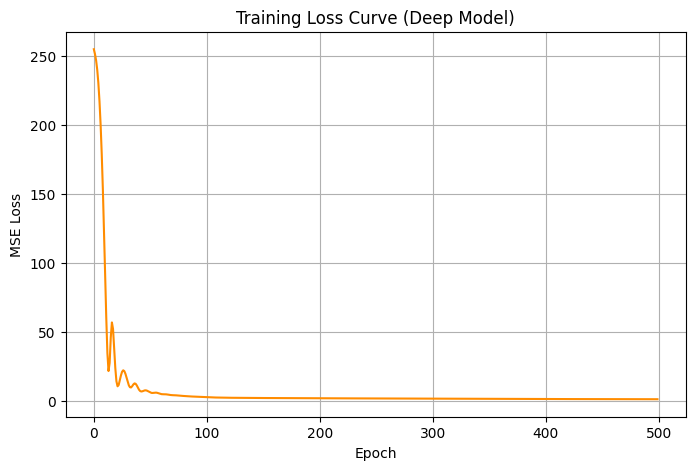

In [13]:
plt.figure(figsize=(8,5))
plt.plot(losses, color='darkorange')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (Deep Model)")
plt.grid(True)
plt.show()

In [14]:
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    print(f"\nTest MSE: {test_loss.item():.4f}")


Test MSE: 1.6934


In [15]:
for i in range(5):
    print(f"Predicted: {y_pred_test[i].item():.2f} | Actual: {y_test[i].item():.2f}")

Predicted: 16.74 | Actual: 16.90
Predicted: 22.10 | Actual: 22.40
Predicted: 21.34 | Actual: 21.40
Predicted: 7.19 | Actual: 7.30
Predicted: 24.38 | Actual: 24.70


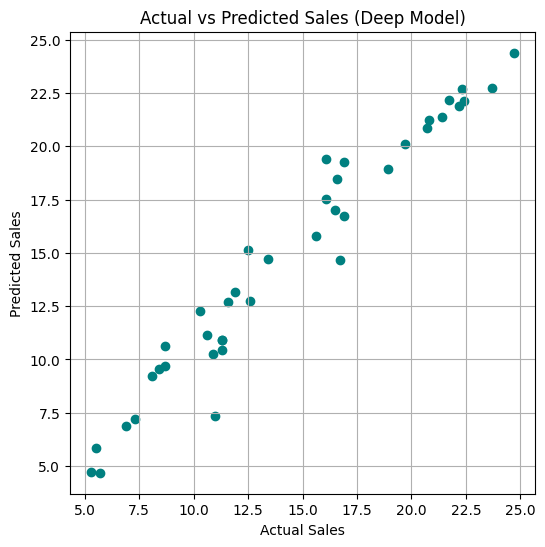

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test.numpy(), y_pred_test.numpy(), color='teal')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Deep Model)")
plt.grid(True)
plt.show()

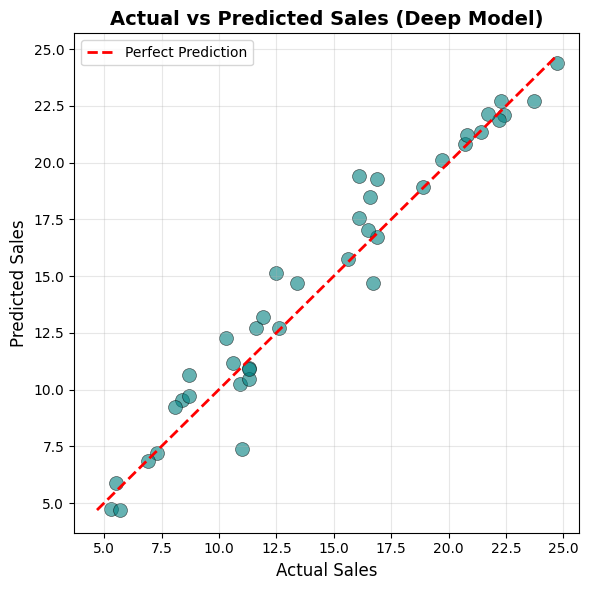

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(y_test.numpy(), y_pred_test.numpy(), color='teal', alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

# Add perfect prediction line (y=x)
min_val = min(y_test.numpy().min(), y_pred_test.numpy().min())
max_val = max(y_test.numpy().max(), y_pred_test.numpy().max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Sales", fontsize=12)
plt.ylabel("Predicted Sales", fontsize=12)
plt.title("Actual vs Predicted Sales (Deep Model)", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
